<a href="https://colab.research.google.com/github/akanshadg/Exploratory-Data-Analysis/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digital Assignment

In [21]:
import pandas as pd
import numpy as np

data = pd.read_csv("Hospital_Patient_Records_encounters.csv")
data

,Id,START,STOP,PATIENT,ORGANIZATION,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION
0,32c84703-2481-49cd-d571-3899d5820253,2011-01-02T09:26:36Z,2011-01-02T12:58:36Z,3de74169-7f67-9304-91d4-757e0f3a14d2,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,ambulatory,185347001,Encounter for problem (procedure),85.55,1018.02,0.00,NaN,NaN
1,c98059da-320a-c0a6-fced-c8815f3e3f39,2011-01-03T05:44:39Z,2011-01-03T06:01:42Z,d9ec2e44-32e9-9148-179a-1653348cc4e2,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,outpatient,308335008,Patient encounter procedure,142.58,2619.36,0.00,NaN,NaN
2,4ad28a3a-2479-782b-f29c-d5b3f41a001e,2011-01-03T14:32:11Z,2011-01-03T14:47:11Z,73babadf-5b2b-fee7-189e-6f41ff213e01,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,outpatient,185349003,Encounter for check up (procedure),85.55,461.59,305.27,NaN,NaN
3,c3f4da61-e4b4-21d5-587a-fbc89943bc19,2011-01-03T16:24:45Z,2011-01-03T16:39:45Z,3b46a0b7-0f34-9b9a-c319-ace4a1f58c0b,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,wellness,162673000,General examination of patient (procedure),136.80,1784.24,0.00,NaN,NaN
4,a9183b4f-2572-72ea-54c2-b3cd038b4be7,2011-01-03T17:36:53Z,2011-01-03T17:51:53Z,fa006887-d93c-d302-8b89-f3c25f88c0e1,d78e84ec-30aa-3bba-a33a-f29a3a454662,42c4fca7-f8a9-3cd1-982a-dd9751bf3e2a,ambulatory,390906007,Follow-up encounter,85.55,234.72,0.00,55822004.0,Hyperlipidemia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27886,917bb534-2ed3-e1f5-ac27-74f314d19c63,2022-01-29T11:42:06Z,2022-01-29T11:57:06Z,0c122290-8c15-77ac-b418-2fea4e8a8e6a,d78e84ec-30aa-3bba-a33a-f29a3a454662,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,outpatient,185349003,Encounter for check up (procedure),85.55,85.55,24.27,NaN,NaN
27887,07710480-9d6b-9c9b-87c3-c1d54df4069d,2022-01-29T20:12:53Z,2022-01-29T20:27:53Z,20a4bc24-6b69-2f5c-dc74-1df390cae25b,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,urgentcare,702927004,Urgent care clinic (procedure),142.58,10588.34,8438.67,NaN,NaN
27888,01b57f06-cebe-a3e4-4423-a796ffb0c35d,2022-01-29T20:35:37Z,2022-01-29T20:50:37Z,ff1b3c26-53a6-4590-ce79-a3f7269274ea,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,ambulatory,424619006,Prenatal visit,142.58,11984.29,0.00,72892002.0,Normal pregnancy
27889,7d435668-0813-eb3b-0f26-cb741fb39561,2022-01-29T20:35:37Z,2022-01-29T20:50:37Z,ff1b3c26-53a6-4590-ce79-a3f7269274ea,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,wellness,162673000,General examination of patient (procedure),136.80,408.80,0.00,NaN,NaN


##### Module 2: Data Transformation

In [22]:
from sklearn.preprocessing import StandardScaler

# Step 1: Remove duplicates
data = data.drop_duplicates()

# Step 2: Handle missing values
# Not dropping missing values in dataset since its not required

# Step 3: Feature engineering
data['START'] = pd.to_datetime(data['START'])
data['STOP'] = pd.to_datetime(data['STOP'])
data['DURATION'] = (data['STOP'] - data['START']).dt.total_seconds() / 3600  # Duration in hours

data['AMOUNT_TO_BE_PAID']=data['TOTAL_CLAIM_COST']-data['PAYER_COVERAGE']

# Step 4: Binning
# Categorize 'BASE_ENCOUNTER_COST' into cost bins
data['COST_CATEGORY'] = pd.cut(
    data['BASE_ENCOUNTER_COST'],
    bins=[0, 100, 200, 500, float('inf')],
    labels=['Low', 'Medium', 'High', 'Very High']
)

#Step 5: Outlier analysis
numerical_columns = ['BASE_ENCOUNTER_COST', 'TOTAL_CLAIM_COST', 'PAYER_COVERAGE', 'AMOUNT_TO_BE_PAID']
for col in numerical_columns:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Drop rows with outliers
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]


data.head()

,Id,START,STOP,PATIENT,ORGANIZATION,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION,DURATION,AMOUNT_TO_BE_PAID,COST_CATEGORY
2,4ad28a3a-2479-782b-f29c-d5b3f41a001e,2011-01-03 14:32:11+00:00,2011-01-03 14:47:11+00:00,73babadf-5b2b-fee7-189e-6f41ff213e01,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,outpatient,185349003,Encounter for check up (procedure),85.55,461.59,305.27,NaN,NaN,0.25,156.32,Low
4,a9183b4f-2572-72ea-54c2-b3cd038b4be7,2011-01-03 17:36:53+00:00,2011-01-03 17:51:53+00:00,fa006887-d93c-d302-8b89-f3c25f88c0e1,d78e84ec-30aa-3bba-a33a-f29a3a454662,42c4fca7-f8a9-3cd1-982a-dd9751bf3e2a,ambulatory,390906007,Follow-up encounter,85.55,234.72,0.00,55822004.0,Hyperlipidemia,0.25,234.72,Low
8,16bdc066-886f-34e1-38fa-afb85090b637,2011-01-04 15:13:10+00:00,2011-01-04 15:28:10+00:00,a80b1160-93f0-db7e-9f23-04ea6fdddfaf,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,wellness,162673000,General examination of patient (procedure),136.80,272.80,0.00,NaN,NaN,0.25,272.80,Medium
12,b04288ff-6e7d-179b-da48-dad3fd8e15c8,2011-01-07 10:28:00+00:00,2011-01-07 10:43:00+00:00,11766433-08db-8155-ef97-93f7e26fe443,d78e84ec-30aa-3bba-a33a-f29a3a454662,d47b3510-2895-3b70-9897-342d681c769d,urgentcare,702927004,Urgent care clinic (procedure),142.58,278.58,0.00,NaN,NaN,0.25,278.58,Medium
13,a9147504-3f81-7c34-b4e0-978a75cc20f1,2011-01-07 11:15:07+00:00,2011-01-07 11:30:07+00:00,0034fe01-207f-275f-6b4b-821f7b0af044,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,outpatient,185349003,Encounter for check up (procedure),85.55,221.55,0.00,NaN,NaN,0.25,221.55,Low


##### Module 3: Correlation Analysis and Time Series Analysis

Correlation Analysis

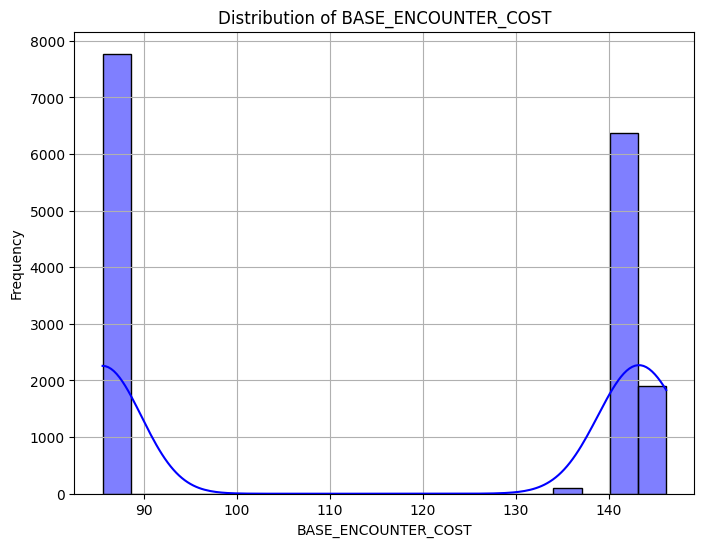

count    16156.000000
mean       115.537930
std         28.889753
min         85.550000
25%         85.550000
50%        142.580000
75%        142.580000
max        146.180000
Name: BASE_ENCOUNTER_COST, dtype: float64


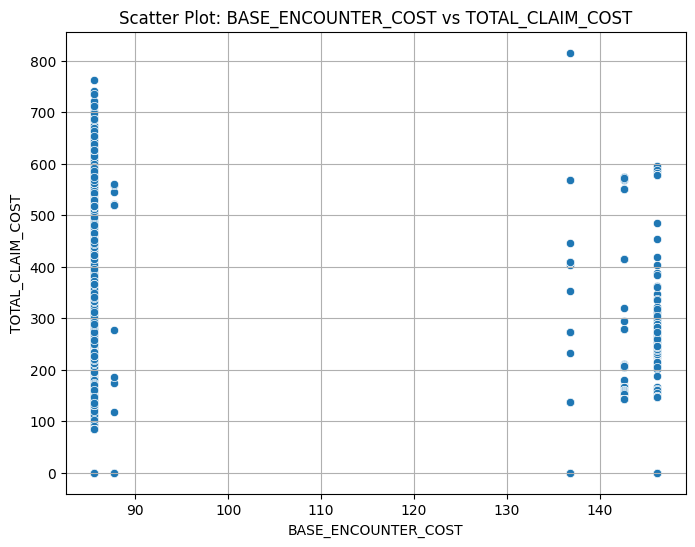

Correlation between BASE_ENCOUNTER_COST and TOTAL_CLAIM_COST: -0.04


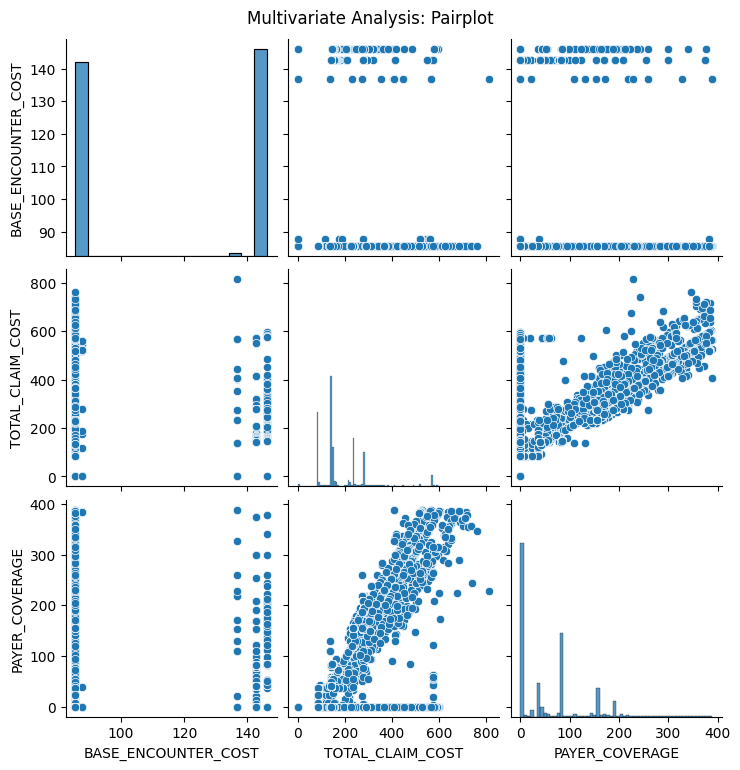

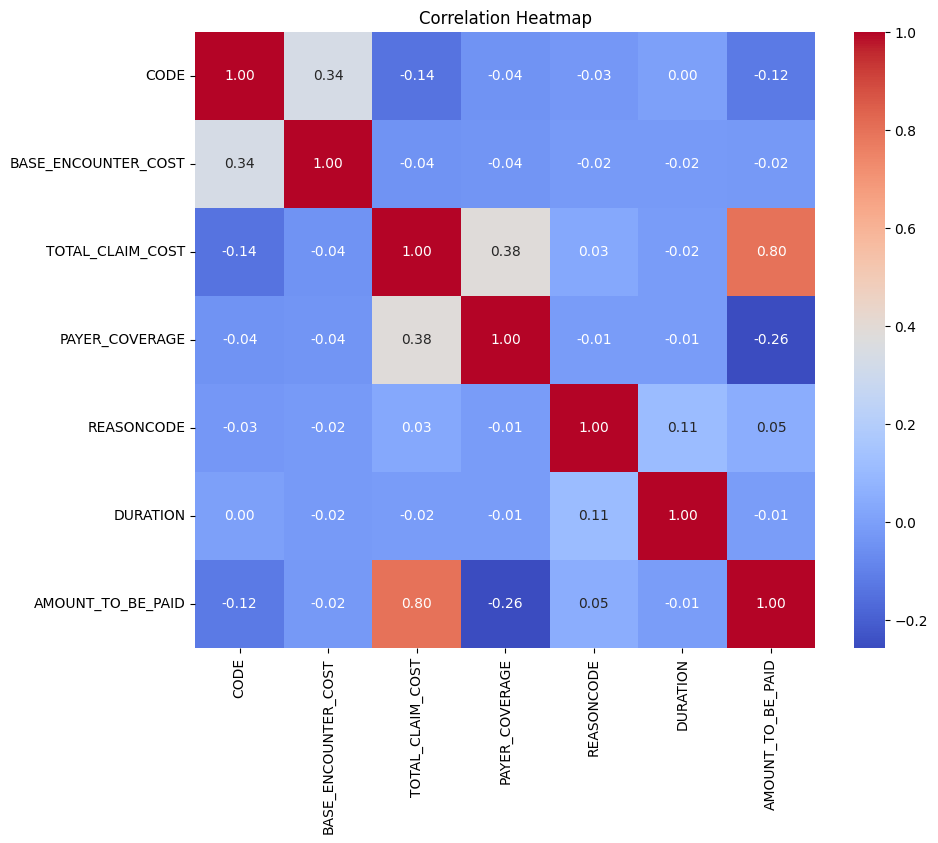

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate analysis: Distribution of 'BASE_ENCOUNTER_COST'
plt.figure(figsize=(8, 6))
sns.histplot(data['BASE_ENCOUNTER_COST'], kde=True, bins=20, color='blue')
plt.title('Distribution of BASE_ENCOUNTER_COST')
plt.xlabel('BASE_ENCOUNTER_COST')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# Summary statistics
print(data['BASE_ENCOUNTER_COST'].describe())


#Bivariate Analyis
# Scatter plot: BASE_ENCOUNTER_COST vs TOTAL_CLAIM_COST
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['BASE_ENCOUNTER_COST'], y=data['TOTAL_CLAIM_COST'])
plt.title('Scatter Plot: BASE_ENCOUNTER_COST vs TOTAL_CLAIM_COST')
plt.xlabel('BASE_ENCOUNTER_COST')
plt.ylabel('TOTAL_CLAIM_COST')
plt.grid()
plt.show()

# Correlation between the two variables
correlation = data['BASE_ENCOUNTER_COST'].corr(data['TOTAL_CLAIM_COST'])
print(f"Correlation between BASE_ENCOUNTER_COST and TOTAL_CLAIM_COST: {correlation:.2f}")


#Multivariate Analysis
# Pairplot for multivariate relationships
sns.pairplot(data[['BASE_ENCOUNTER_COST', 'TOTAL_CLAIM_COST', 'PAYER_COVERAGE']])
plt.suptitle('Multivariate Analysis: Pairplot', y=1.02)
plt.show()


# Heatmap for correlations
numerical_features = data.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_features.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Time Series Analysis

                                                             Id  \
START                                                             
2011-01-03 14:32:11+00:00  4ad28a3a-2479-782b-f29c-d5b3f41a001e   
2011-01-03 17:36:53+00:00  a9183b4f-2572-72ea-54c2-b3cd038b4be7   
2011-01-04 15:13:10+00:00  16bdc066-886f-34e1-38fa-afb85090b637   
2011-01-07 10:28:00+00:00  b04288ff-6e7d-179b-da48-dad3fd8e15c8   
2011-01-07 11:15:07+00:00  a9147504-3f81-7c34-b4e0-978a75cc20f1   

                                               STOP  \
START                                                 
2011-01-03 14:32:11+00:00 2011-01-03 14:47:11+00:00   
2011-01-03 17:36:53+00:00 2011-01-03 17:51:53+00:00   
2011-01-04 15:13:10+00:00 2011-01-04 15:28:10+00:00   
2011-01-07 10:28:00+00:00 2011-01-07 10:43:00+00:00   
2011-01-07 11:15:07+00:00 2011-01-07 11:30:07+00:00   

                                                        PATIENT  \
START                                                             
2011-01-03

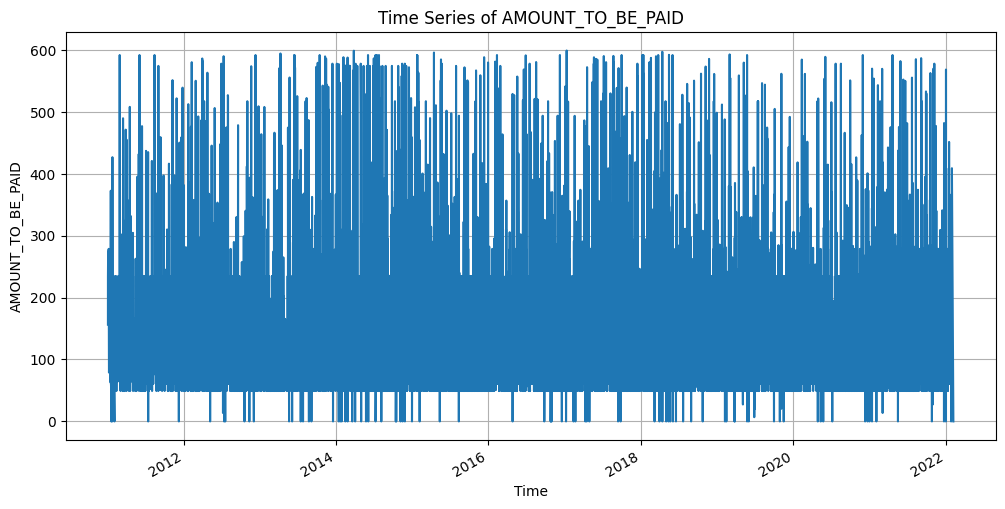

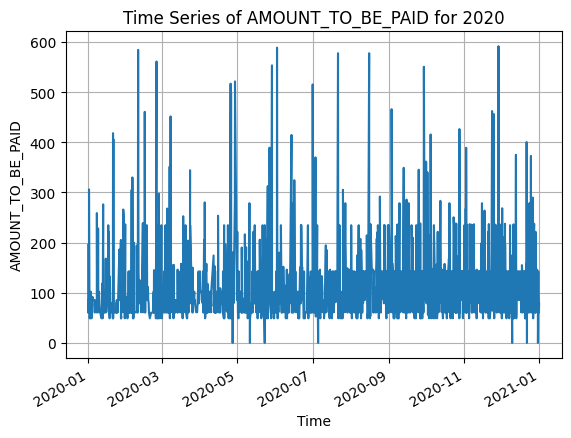

<ipython-input-24-740449f007d9>:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data['AMOUNT_TO_BE_PAID'].resample('M').mean()


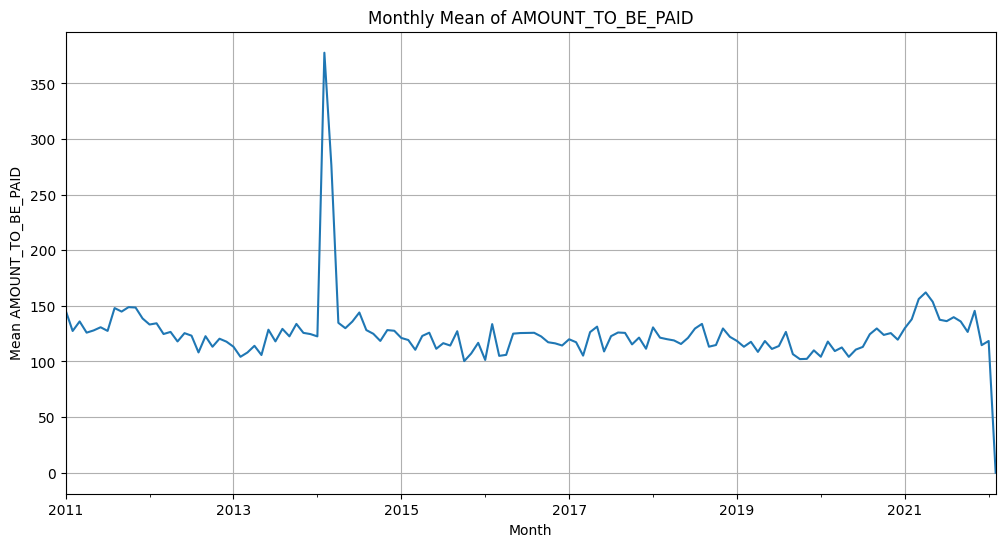

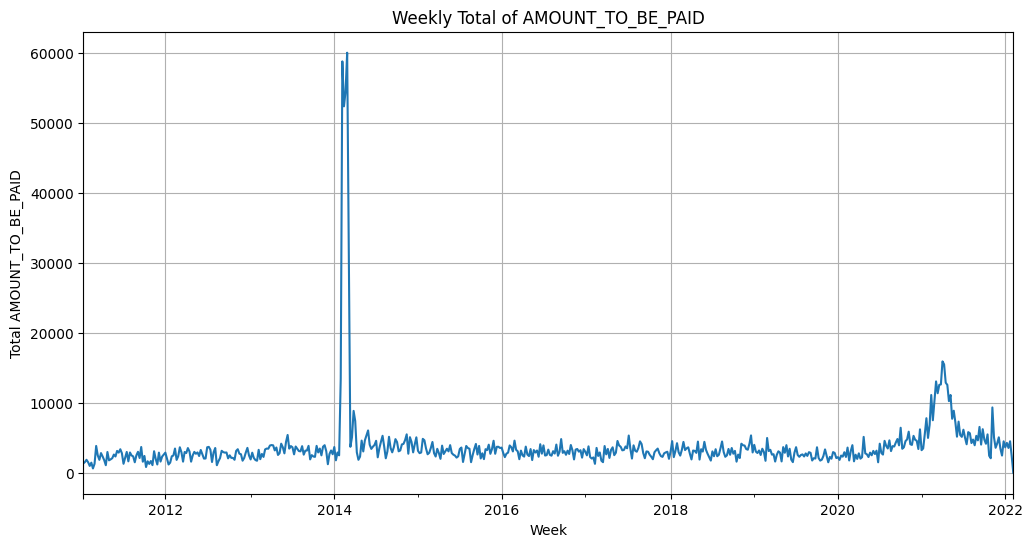

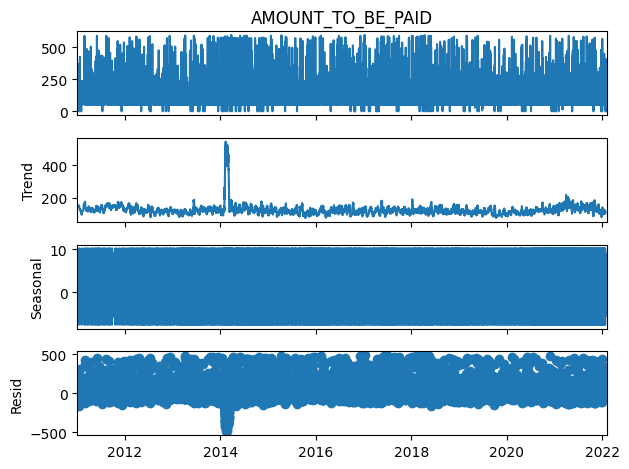

In [24]:
# Ensure START is datetime and set as index
data['START'] = pd.to_datetime(data['START'])
data.set_index('START', inplace=True)
print(data.head())

# Plot time series for AMOUNT_TO_BE_PAID
plt.figure(figsize=(12, 6))
data['AMOUNT_TO_BE_PAID'].plot()
plt.title('Time Series of AMOUNT_TO_BE_PAID')
plt.xlabel('Time')
plt.ylabel('AMOUNT_TO_BE_PAID')
plt.grid()
plt.show()

#Plotting time series for AMOUNT_TO_BE_PAID for 2020
data.loc['2020', 'AMOUNT_TO_BE_PAID'].plot()
plt.title('Time Series of AMOUNT_TO_BE_PAID for 2020')
plt.xlabel('Time')
plt.ylabel('AMOUNT_TO_BE_PAID')
plt.grid()
plt.show()

# Group by month and compute mean AMOUNT_TO_BE_PAID
monthly_data = data['AMOUNT_TO_BE_PAID'].resample('M').mean()

plt.figure(figsize=(12, 6))
monthly_data.plot()
plt.title('Monthly Mean of AMOUNT_TO_BE_PAID')
plt.xlabel('Month')
plt.ylabel('Mean AMOUNT_TO_BE_PAID')
plt.grid()
plt.show()

# Resample daily data to weekly sums
weekly_data = data['AMOUNT_TO_BE_PAID'].resample('W').sum()

plt.figure(figsize=(12, 6))
weekly_data.plot()
plt.title('Weekly Total of AMOUNT_TO_BE_PAID')
plt.xlabel('Week')
plt.ylabel('Total AMOUNT_TO_BE_PAID')
plt.grid()
plt.show()


from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(data['AMOUNT_TO_BE_PAID'], model='additive', period=30)

# Plot decomposition
decomposition.plot()
plt.show()


##### Module 4: Data Summarization and Visualization

               CODE  BASE_ENCOUNTER_COST  TOTAL_CLAIM_COST  PAYER_COVERAGE  \
count  1.615600e+04         16156.000000      16156.000000    16156.000000   
mean   3.179535e+08           115.537930        196.847358       61.317415   
std    2.205582e+08            28.889753        120.056109       75.283080   
min    1.853470e+06            85.550000          0.000000        0.000000   
25%    1.853450e+08            85.550000        142.580000        0.000000   
50%    1.853490e+08           142.580000        146.180000       36.440000   
75%    4.483370e+08           142.580000        234.720000       84.940000   
max    7.029270e+08           146.180000        815.320000      388.620000   

         REASONCODE      DURATION  AMOUNT_TO_BE_PAID  
count  6.091000e+03  16156.000000       16156.000000  
mean   6.130126e+10      9.640939         135.529942  
std    2.755273e+12    519.073091         114.804882  
min    5.602001e+06      0.250000           0.000000  
25%    5.582200e+07   

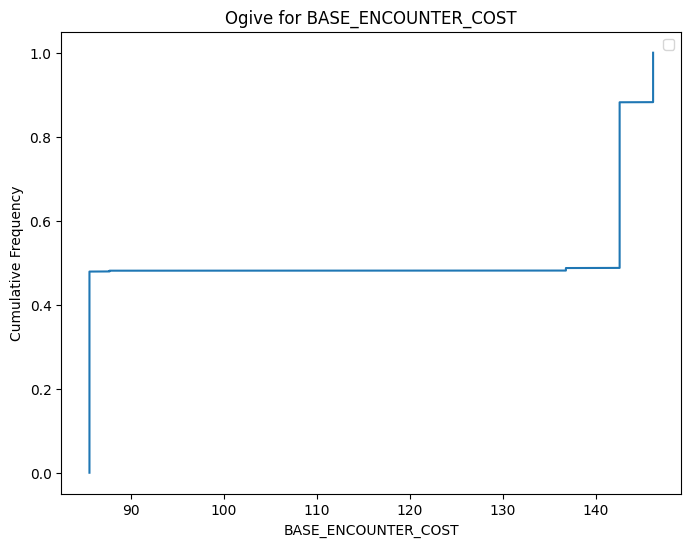

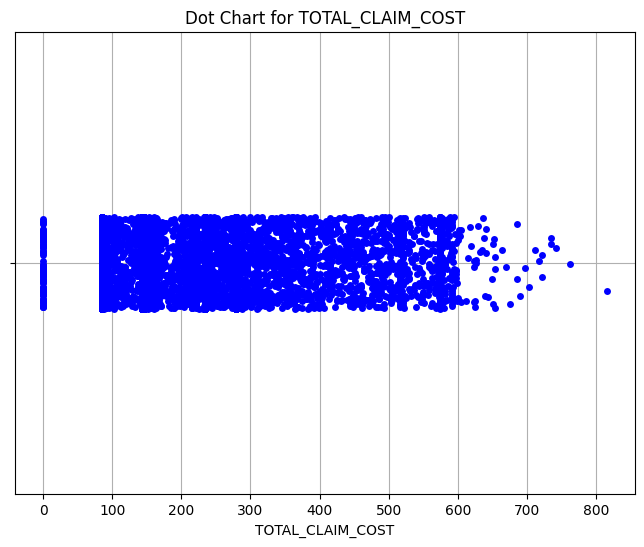

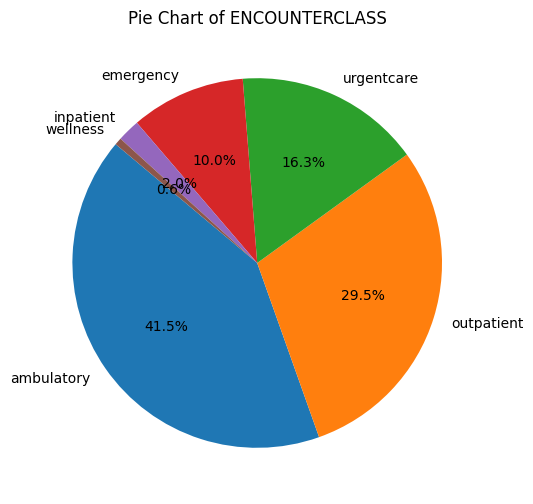

<ipython-input-25-f3ced305843d>:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['ENCOUNTERCLASS'], palette='Set2')


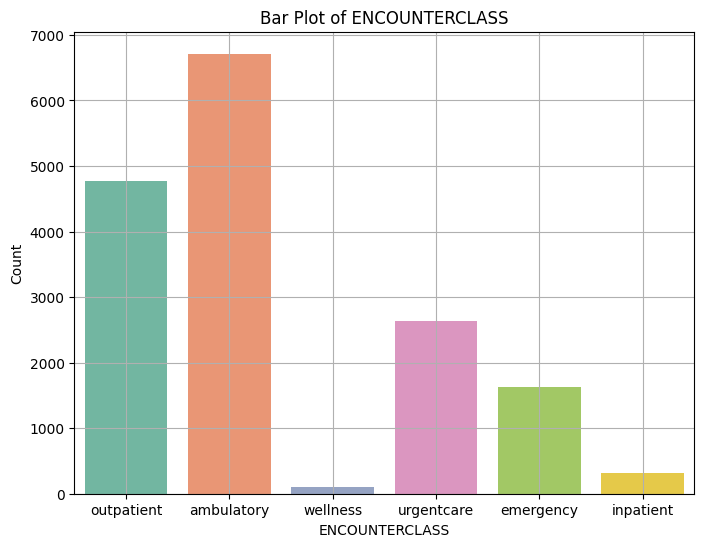

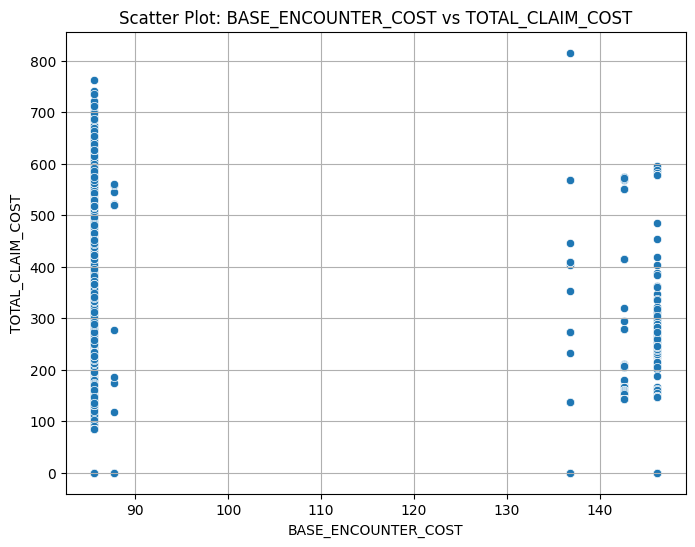

Correlation between BASE_ENCOUNTER_COST and TOTAL_CLAIM_COST: -0.04
Pearson Correlation Coefficient: -0.04
P-value: 0.0000


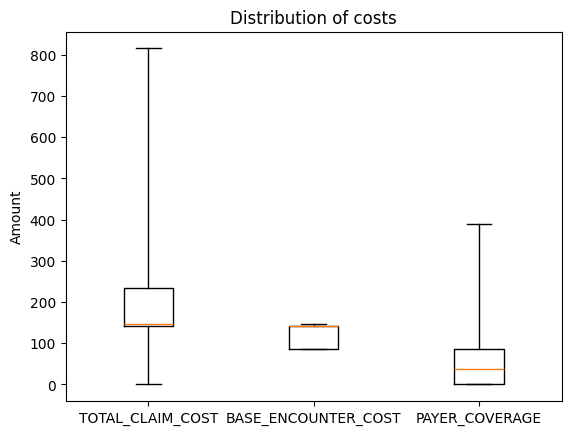

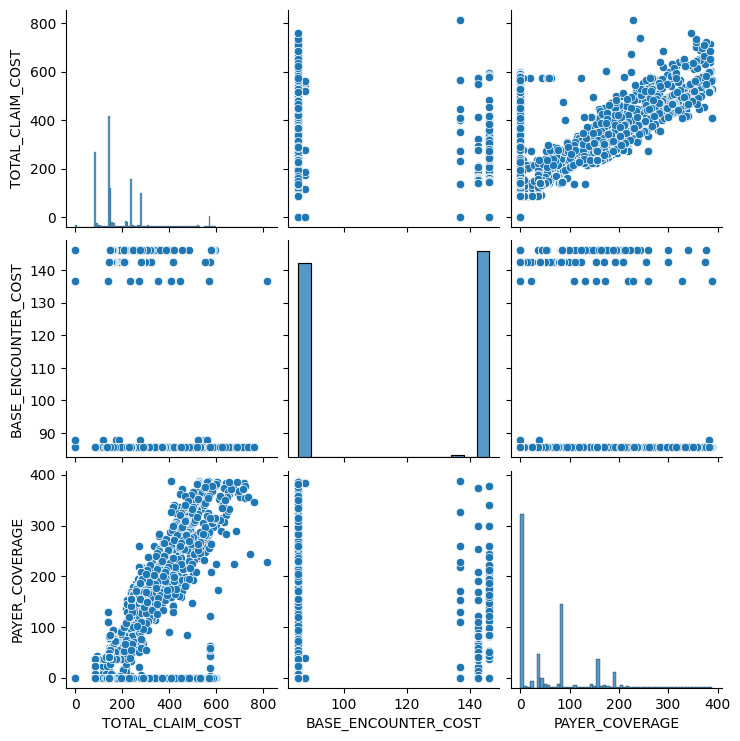

Contingency Table (COST_CATEGORY vs ENCOUNTERCLASS):
ENCOUNTERCLASS  ambulatory  emergency  inpatient  outpatient  urgentcare  \
COST_CATEGORY                                                              
Low                   4289          1         33        3449           0   
Medium                2423       1621        285        1324        2629   

ENCOUNTERCLASS  wellness  
COST_CATEGORY             
Low                    0  
Medium               102  


In [25]:
# Statistical summary of numerical columns
print(data.describe())

# Additional statistical measures
print("\nSkewness:")
print(numerical_features.skew())  # Skewness of numerical columns
print("\nKurtosis:")
print(numerical_features.kurt())  # Kurtosis of numerical columns

# Variance and standard deviation
print("\nVariance:")
print(numerical_features.var())
print("Standard Deviation:")
print(numerical_features.std())


#1D Statistical Analysis
# For 'BASE_ENCOUNTER_COST' as an example
print("\n1-D Statistical Analysis for BASE_ENCOUNTER_COST")
print("Mean:", data['BASE_ENCOUNTER_COST'].mean())
print("Median:", data['BASE_ENCOUNTER_COST'].median())
print("Mode:", data['BASE_ENCOUNTER_COST'].mode()[0])  # Mode can return multiple values
print("Skewness:", data['BASE_ENCOUNTER_COST'].skew())
print("Kurtosis:", data['BASE_ENCOUNTER_COST'].kurt())

#ogive
data_sorted = np.sort(data['BASE_ENCOUNTER_COST'].dropna())
# Calculate cumulative frequency
cumulative_frequency = np.arange(1, len(data_sorted) + 1) / len(data_sorted)
# Plot the ogive
plt.figure(figsize=(8, 6))
plt.plot(data_sorted, cumulative_frequency)
plt.title('Ogive for BASE_ENCOUNTER_COST')
plt.xlabel('BASE_ENCOUNTER_COST')
plt.ylabel('Cumulative Frequency')
plt.legend()
plt.show()

# Dot chart for 'TOTAL_CLAIM_COST'
plt.figure(figsize=(8, 6))
sns.stripplot(x=data['TOTAL_CLAIM_COST'], jitter=True, color='blue')
plt.title('Dot Chart for TOTAL_CLAIM_COST')
plt.xlabel('TOTAL_CLAIM_COST')
plt.grid()
plt.show()

#analysis of categorical variable
category_counts = data['ENCOUNTERCLASS'].value_counts()
# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    category_counts,
    labels=category_counts.index,
    autopct='%1.1f%%',  # Display percentage
    startangle=140,     # Rotate start angle
)
plt.title('Pie Chart of ENCOUNTERCLASS')
plt.show()

# Bar plot for categorical data: Distribution of 'ENCOUNTERCLASS'
plt.figure(figsize=(8, 6))
sns.countplot(x=data['ENCOUNTERCLASS'], palette='Set2')
plt.title('Bar Plot of ENCOUNTERCLASS')
plt.xlabel('ENCOUNTERCLASS')
plt.ylabel('Count')
plt.grid(True)
plt.show()

#2D Statistical Analysis
# Scatter plot for 2-D analysis: BASE_ENCOUNTER_COST vs TOTAL_CLAIM_COST
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['BASE_ENCOUNTER_COST'], y=data['TOTAL_CLAIM_COST'])
plt.title('Scatter Plot: BASE_ENCOUNTER_COST vs TOTAL_CLAIM_COST')
plt.xlabel('BASE_ENCOUNTER_COST')
plt.ylabel('TOTAL_CLAIM_COST')
plt.grid()
plt.show()

# Correlation between two variables
correlation_2d = data['BASE_ENCOUNTER_COST'].corr(data['TOTAL_CLAIM_COST'])
print(f"Correlation between BASE_ENCOUNTER_COST and TOTAL_CLAIM_COST: {correlation_2d:.2f}")

from scipy.stats import pearsonr

# Calculate Pearson's r and p-value
r, p = pearsonr(data['BASE_ENCOUNTER_COST'], data['TOTAL_CLAIM_COST'])
print(f"Pearson Correlation Coefficient: {r:.2f}")
print(f"P-value: {p:.4f}")

plt.boxplot([data['TOTAL_CLAIM_COST'], data['BASE_ENCOUNTER_COST'], data['PAYER_COVERAGE']], whis=99)
plt.title('Distribution of costs')
plt.ylabel('Amount')
plt.xticks([1,2,3], ['TOTAL_CLAIM_COST', 'BASE_ENCOUNTER_COST', 'PAYER_COVERAGE'])
plt.show()

# n-D Statistical Analysis
#Pairplot for N-D Analyss\is
sns.pairplot(data, vars=['TOTAL_CLAIM_COST', 'BASE_ENCOUNTER_COST', 'PAYER_COVERAGE'])
plt.show()



# Contingency tables
# Example: Contingency table between 'COST_CATEGORY' and 'ENCOUNTERCLASS'
contingency_table = pd.crosstab(data['COST_CATEGORY'], data['ENCOUNTERCLASS'])
print("Contingency Table (COST_CATEGORY vs ENCOUNTERCLASS):")
print(contingency_table)


##### Module 5: Clustering algorithms

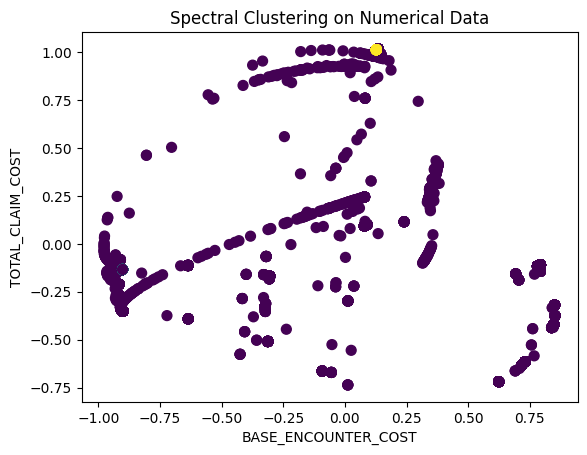

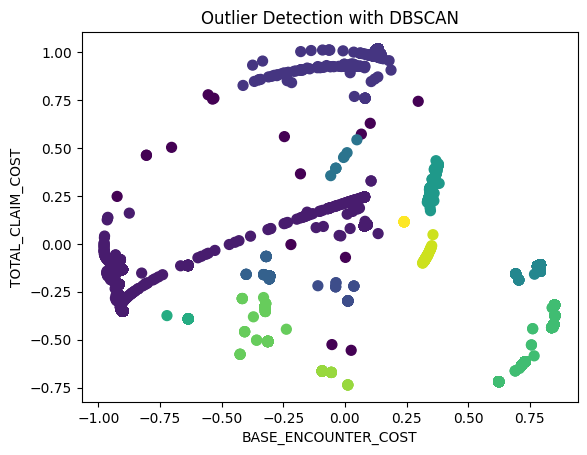

In [26]:
#Spectral Clustering
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

numeric_data=numerical_features.dropna()

# Scaling the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_data)

# Normalizing the Data
X_normalized = normalize(X_scaled)

# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)

# Reducing the dimensions of the data
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
labels = spectral.fit_predict(X_principal)

# Visualize results
plt.scatter(X_principal['P1'], X_principal['P2'], c=labels, cmap='viridis', s=50)
plt.title('Spectral Clustering on Numerical Data')
plt.xlabel('BASE_ENCOUNTER_COST')
plt.ylabel('TOTAL_CLAIM_COST')
plt.show()



#Outlier detection using clustering
from sklearn.cluster import DBSCAN

# Apply DBSCAN to detect outliers
dbscan = DBSCAN(eps=0.1, min_samples=5)
labels = dbscan.fit_predict(X_principal)

# Visualize clusters and outliers
plt.scatter(X_principal['P1'], X_principal['P2'], c=labels, cmap='viridis', s=50)
plt.title('Outlier Detection with DBSCAN')
plt.xlabel('BASE_ENCOUNTER_COST')
plt.ylabel('TOTAL_CLAIM_COST')
plt.show()

##### Module 6: Dimensionality Reduction

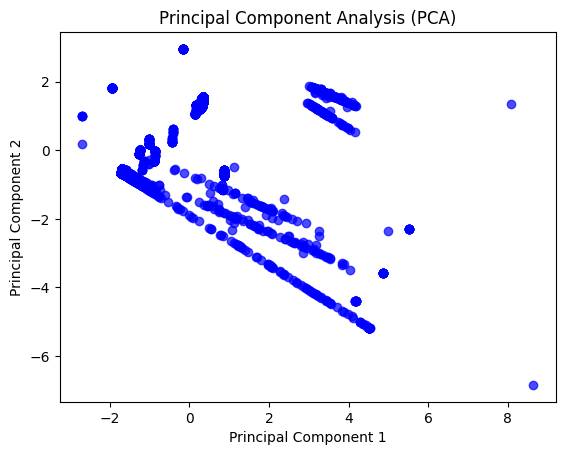

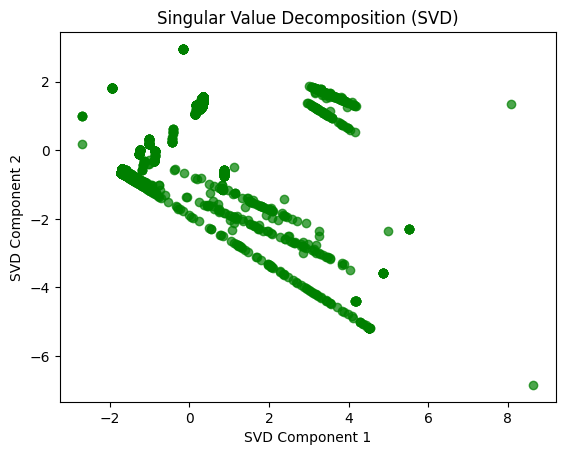

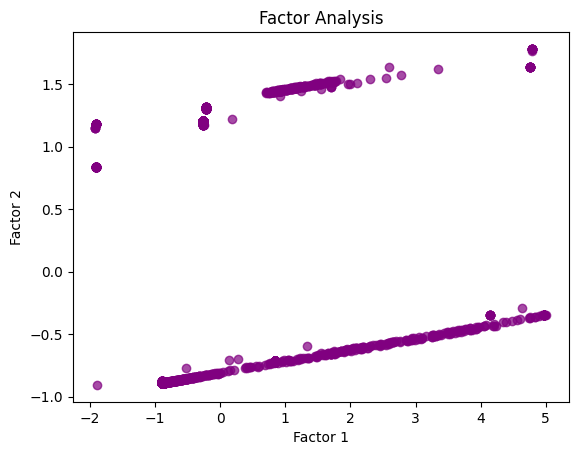

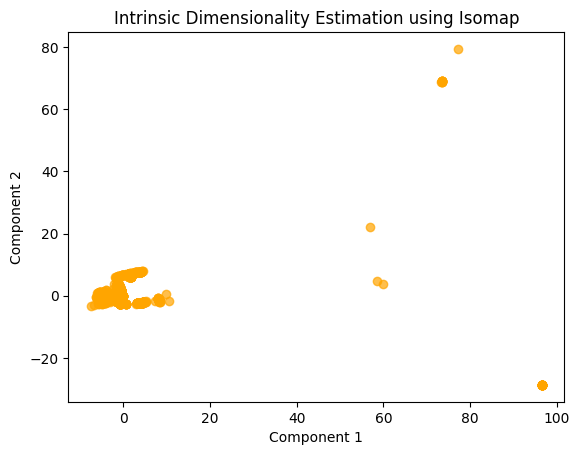

In [27]:
#Principal Component Analysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
#from sklearn.exceptions import SparseEfficiencyWarning

# Suppress SparseEfficiencyWarning
warnings.filterwarnings('ignore', module='scipy')

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame for PCA components
pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])

# Visualize the PCA result
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7, c='blue')
plt.title('Principal Component Analysis (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


#Single Value Decomposition
from sklearn.decomposition import TruncatedSVD

# Apply Truncated SVD (similar to PCA, but for sparse data)
svd = TruncatedSVD(n_components=2)
svd_components = svd.fit_transform(scaled_data)

# Visualize the SVD result
plt.scatter(svd_components[:, 0], svd_components[:, 1], alpha=0.7, c='green')
plt.title('Singular Value Decomposition (SVD)')
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')
plt.show()


#Factor Analysis
from sklearn.decomposition import FactorAnalysis

# Apply Factor Analysis
fa = FactorAnalysis(n_components=2)
fa_components = fa.fit_transform(scaled_data)

# Visualize the Factor Analysis result
plt.scatter(fa_components[:, 0], fa_components[:, 1], alpha=0.7, c='purple')
plt.title('Factor Analysis')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.show()


#Intrinsic Dimensionality
from sklearn.manifold import Isomap

# Apply Isomap to estimate intrinsic dimensionality (2 components)
isomap = Isomap(n_components=2)
isomap_components = isomap.fit_transform(scaled_data)

# Visualize the Isomap result
plt.scatter(isomap_components[:, 0], isomap_components[:, 1], alpha=0.7, c='orange')
plt.title('Intrinsic Dimensionality Estimation using Isomap')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()



##### Module 7: Model Development and Evaluation

Mean Squared Error (MSE): 12805.265820962664
R-squared (R²): 0.11349101433238284


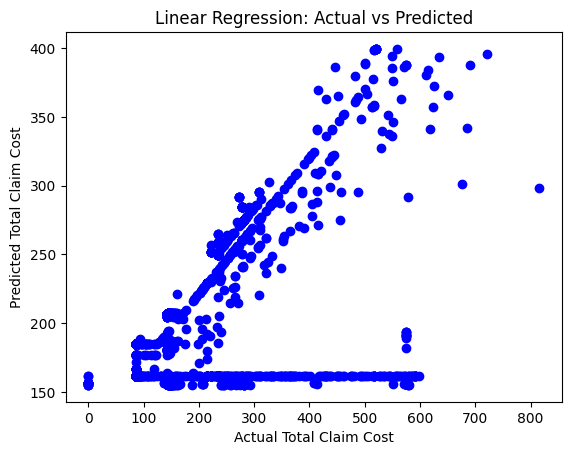

In [28]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Select relevant numerical features for linear regression
data = data.dropna(subset=['BASE_ENCOUNTER_COST', 'TOTAL_CLAIM_COST', 'PAYER_COVERAGE'])  # Drop rows with missing values
X = data[['BASE_ENCOUNTER_COST', 'PAYER_COVERAGE']]  # Features (independent variables)
y = data['TOTAL_CLAIM_COST']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Plotting the predicted vs actual values
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Total Claim Cost')
plt.ylabel('Predicted Total Claim Cost')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()